In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Gathering Data

In [2]:
data=pd.read_csv("../input/stack-overflow-developer-survey-results-2019/survey_results_public.csv")

In [3]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


ASSESSING DATA

In [4]:
data.shape

(88883, 85)

In [5]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [6]:
data.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.003357,0.002930,-0.004589,-0.005240,-0.001829
CompTotal,-0.003357,1.000000,0.039725,0.003074,0.061090,0.016500
ConvertedComp,0.002930,0.039725,1.000000,0.013908,-0.021261,0.108268
WorkWeekHrs,-0.004589,0.003074,0.013908,1.000000,0.021092,0.019976
CodeRevHrs,-0.005240,0.061090,-0.021261,0.021092,1.000000,-0.022486
Age,-0.001829,0.016500,0.108268,0.019976,-0.022486,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [8]:
data['Employment'].value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

In [9]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [10]:
data_student=data[data['MainBranch']=='I am a student who is learning to code']

In [11]:
data_student_india=data_student[data_student['Country']=='India']

In [12]:
data_student_india.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

DATA CLEANING

In [13]:
data_student_india.drop(['CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
data_student_india.drop(['WorkPlan','WorkChallenge','WorkRemote','WorkLoc','ImpSyn','CodeRev','CodeRevHrs','UnitTests','PurchaseHow','PurchaseWhat'],axis=1,inplace=True)

In [15]:
data_student_india.drop(['OrgSize','YearsCodePro','CareerSat','JobSat','MgrIdiot','MgrMoney','MgrWant','LastInt','FizzBuzz'],axis=1,inplace=True)

In [16]:
data_student_india_age=data_student_india[data_student_india['Age']>22]

In [30]:
data_student_india_age.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
899,902,I am a student who is learning to code,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,NaN,"Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,23.0,Woman,No,Straight / Heterosexual,NaN,Yes,Too long,Neither easy nor difficult
1407,1414,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot less welcome now than last year,Tech articles written by other developers;Indu...,26.0,Man,No,NaN,South Asian,Yes,Too long,Easy
1457,1464,I am a student who is learning to code,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,"Yes, full-time",NaN,"Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Courses on technologies you're interested in,23.0,Man,No,Straight / Heterosexual,South Asian,No,Too long,Neither easy nor difficult
1778,1786,I am a student who is learning to code,No,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",India,"Yes, part-time",Some college/university study without earning ...,"A business discipline (ex. accounting, finance...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,24.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Easy
1867,1875,I am a student who is learning to code,Yes,Once a month or more often,NaN,"Not employed, but looking for work",India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,...,Just as welcome now as I felt last year,NaN,23.0,Man,NaN,Straight / Heterosexual,NaN,Yes,Appropriate in length,Easy


EXPLORATORY DATA ANALYSIS

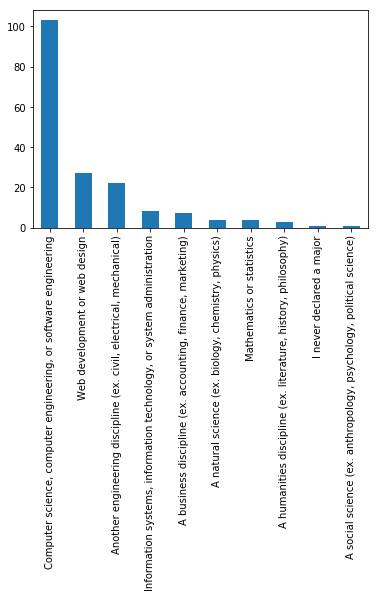

In [18]:
data_student_india_age['UndergradMajor'].value_counts().plot(kind='bar')

In [19]:
ct=pd.crosstab(data_student_india_age['SOFindAnswer'],data_student_india_age['SOTimeSaved'])

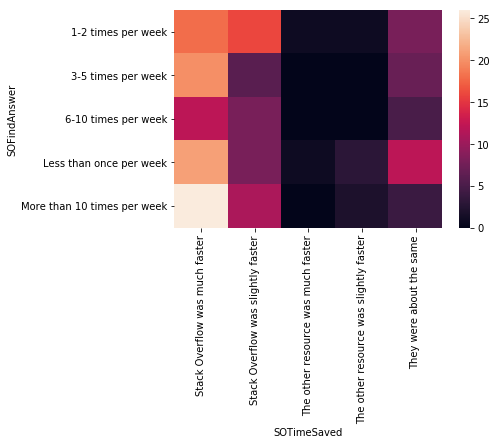

In [20]:
sns.heatmap(ct)

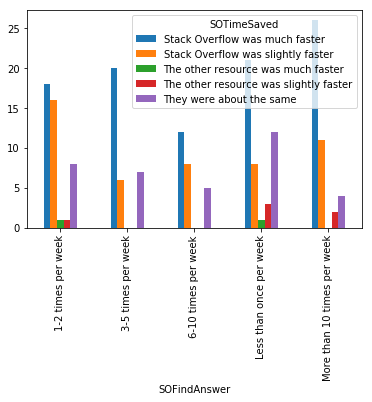

In [21]:
ct.plot(kind='bar')

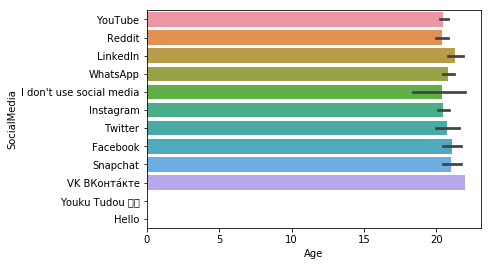

In [22]:
sns.barplot(x='Age',y='SocialMedia',data=data_student_india)

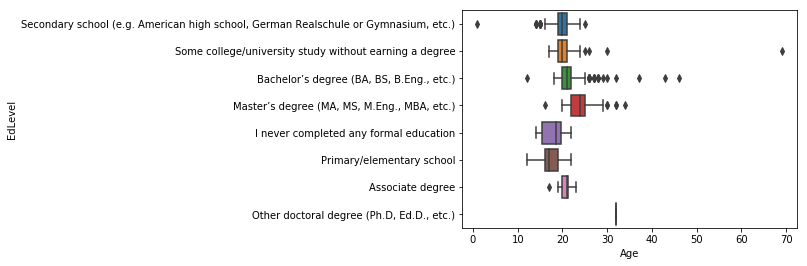

In [23]:
sns.boxplot(x='Age',y='EdLevel',data=data_student_india)

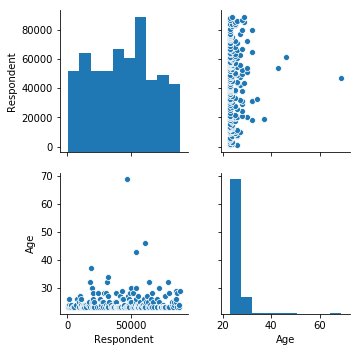

In [24]:
sns.pairplot(data_student_india_age)

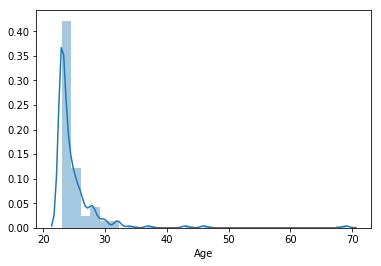

In [25]:
sns.distplot(data_student_india_age['Age'],bins=30)

In [26]:
data_student_india_age.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'DevType', 'YearsCode', 'Age1stCode', 'JobSeek',
       'LastHireDate', 'JobFactors', 'ResumeUpdate', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents', 'SurveyLength', 

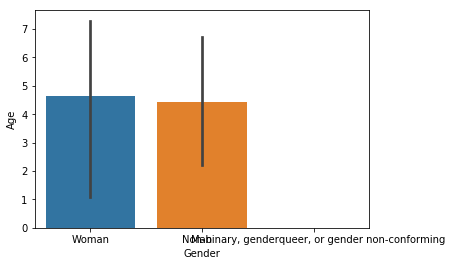

In [27]:
sns.barplot(x='Gender',y='Age',data=data_student_india_age,estimator=np.std)

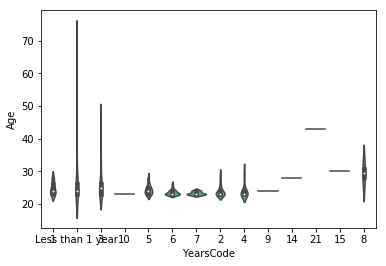

In [28]:
sns.violinplot(x='YearsCode',y='Age',data=data_student_india_age,split=True)

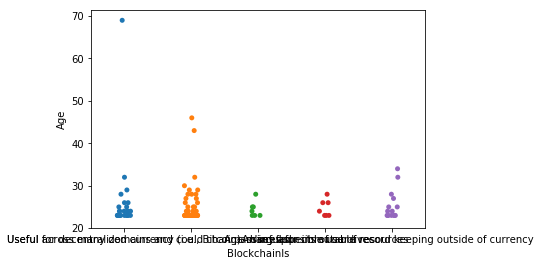

In [29]:
sns.stripplot(x='BlockchainIs',y='Age',data=data_student_india_age,jitter=True)